**TRABAJO PRÁCTICO 2 APRENDIZAJE AUTOMÁTICO I TUIA 2024**

INTEGRANTES:

Herrera Morena (H-1187/8)

Zorzolo Rubio Juana (Z-1217/3)

# Carga de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error

In [ ]:
!gdown "12Cu0b2V5ggyQPBlE9DbV8MC3PS8nC5IO" --output "weatherAUS.csv"

Downloading...
From: https://drive.google.com/uc?id=12Cu0b2V5ggyQPBlE9DbV8MC3PS8nC5IO
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 182MB/s]


In [ ]:
df_weather = pd.read_csv('weatherAUS.csv')
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# seleccionar 10 ciudades aleatorias con random_state = 42 para siempre obtener los mismos resultados
ciudades_aleatorias = df_weather['Location'].sample(n=10, random_state=42)
print(ciudades_aleatorias)

100721    MountGambier
30234           Sydney
68427        Melbourne
28624         Richmond
31173           Sydney
573             Albury
120056    PerthAirport
43057       Wollongong
28966         Richmond
90691        GoldCoast
Name: Location, dtype: object


In [ ]:
df_weather = df_weather[df_weather['Location'].isin(ciudades_aleatorias)]
df_weather['Location'].value_counts()

,count
Location,
Sydney,3344
Melbourne,3193
Albury,3040
Wollongong,3040
GoldCoast,3040
MountGambier,3040
Richmond,3009
PerthAirport,3009


# Codificación de variables

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24715 entries, 0 to 120637
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           24715 non-null  object 
 1   Location       24715 non-null  object 
 2   MinTemp        24180 non-null  float64
 3   MaxTemp        24184 non-null  float64
 4   Rainfall       23736 non-null  float64
 5   Evaporation    13745 non-null  float64
 6   Sunshine       12121 non-null  float64
 7   WindGustDir    23307 non-null  object 
 8   WindGustSpeed  23310 non-null  float64
 9   WindDir9am     22917 non-null  object 
 10  WindDir3pm     24414 non-null  object 
 11  WindSpeed9am   24552 non-null  float64
 12  WindSpeed3pm   24571 non-null  float64
 13  Humidity9am    24095 non-null  float64
 14  Humidity3pm    24094 non-null  float64
 15  Pressure9am    24125 non-null  float64
 16  Pressure3pm    24144 non-null  float64
 17  Cloud9am       14111 non-null  float64
 18  Cloud3pm  

In [ ]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_weather['Location'] = df_weather['Location'].astype('category')
df_weather['WindDir9am'] = df_weather['WindDir9am'].astype('category')
df_weather['WindDir3pm'] = df_weather['WindDir3pm'].astype('category')
df_weather['WindGustDir'] = df_weather['WindGustDir'].astype('category')
df_weather['RainToday'] = df_weather['RainToday'].map({'Yes': 1, 'No': 0})
df_weather['RainTomorrow'] = df_weather['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Partición de datos

Se decidió realizar la validación cruzada train-test antes de la limpieza y análisis del conjunto de datos ya que así aseguramos que el modelo evalúe de manera justa en datos que nunca ha visto durante el entrenamiento. El objetivo es simular cómo se comportaría el modelo con datos reales, fuera del entorno controlado.

Separamos las variables independientes (X) de la variable dependiente (y), que en nuestro trabajo es la variable MEDV (a quien queremos predecir).

In [ ]:
X = df_weather.drop("RainTomorrow", axis=1)
y = df_weather["RainTomorrow"]

Dividimos también los datos en TRAIN y TEST, fundamental para poder entrenar nuestro modelo y luego testearlo.

Decidimos separar un 80% para entrenamiento, y el 20% restante para prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19772, 22), (4943, 22), (19772,), (4943,))

In [ ]:
# Combinamos los datas de entrenamiento y los de testeo para mayor facilidad al momento de trabajarlos
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Limpieza de datos

## Valores nulos

### Para df_train

In [ ]:
filas_nan = df_train[df_train.isna().sum(axis=1) > 15]
q_filas_nan = len(filas_nan)
df_train = df_train.dropna(thresh=df_train.shape[1] - 15)

In [ ]:
df_train['RainToday'] = df_train['RainToday'].fillna(df_train['RainToday'].mode().iloc[0])
df_train['RainTomorrow'] = df_train['RainTomorrow'].fillna(df_train['RainTomorrow'].mode().iloc[0])
df_train['WindDir9am'] = df_train['WindDir9am'].fillna(df_train['WindDir9am'].mode().iloc[0])
df_train['WindDir3pm'] = df_train['WindDir3pm'].fillna(df_train['WindDir3pm'].mode().iloc[0])
df_train['WindGustDir'] = df_train['WindGustDir'].fillna(df_train['WindGustDir'].mode().iloc[0])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19755 entries, 93147 to 119577
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           19755 non-null  datetime64[ns]
 1   Location       19755 non-null  category      
 2   MinTemp        19343 non-null  float64       
 3   MaxTemp        19347 non-null  float64       
 4   Rainfall       19005 non-null  float64       
 5   Evaporation    10963 non-null  float64       
 6   Sunshine       9680 non-null   float64       
 7   WindGustDir    19755 non-null  category      
 8   WindGustSpeed  18655 non-null  float64       
 9   WindDir9am     19755 non-null  category      
 10  WindDir3pm     19755 non-null  category      
 11  WindSpeed9am   19641 non-null  float64       
 12  WindSpeed3pm   19652 non-null  float64       
 13  Humidity9am    19282 non-null  float64       
 14  Humidity3pm    19283 non-null  float64       
 15  Pressure9am    1929

### Para df_test

In [ ]:
filas_nan = df_test[df_test.isna().sum(axis=1) > 15]
q_filas_nan = len(filas_nan)
df_test = df_test.dropna(thresh=df_test.shape[1] - 15)

In [ ]:
df_test['RainToday'] = df_test['RainToday'].fillna(df_test['RainToday'].mode().iloc[0])
df_test['RainTomorrow'] = df_test['RainTomorrow'].fillna(df_test['RainTomorrow'].mode().iloc[0])
df_test['WindDir9am'] = df_test['WindDir9am'].fillna(df_test['WindDir9am'].mode().iloc[0])
df_test['WindDir3pm'] = df_test['WindDir3pm'].fillna(df_test['WindDir3pm'].mode().iloc[0])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4940 entries, 28233 to 101579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4940 non-null   datetime64[ns]
 1   Location       4940 non-null   category      
 2   MinTemp        4829 non-null   float64       
 3   MaxTemp        4830 non-null   float64       
 4   Rainfall       4730 non-null   float64       
 5   Evaporation    2781 non-null   float64       
 6   Sunshine       2441 non-null   float64       
 7   WindGustDir    4648 non-null   category      
 8   WindGustSpeed  4649 non-null   float64       
 9   WindDir9am     4940 non-null   category      
 10  WindDir3pm     4940 non-null   category      
 11  WindSpeed9am   4911 non-null   float64       
 12  WindSpeed3pm   4918 non-null   float64       
 13  Humidity9am    4813 non-null   float64       
 14  Humidity3pm    4810 non-null   float64       
 15  Pressure9am    4823 

## Valores atípicos

### Para df_train

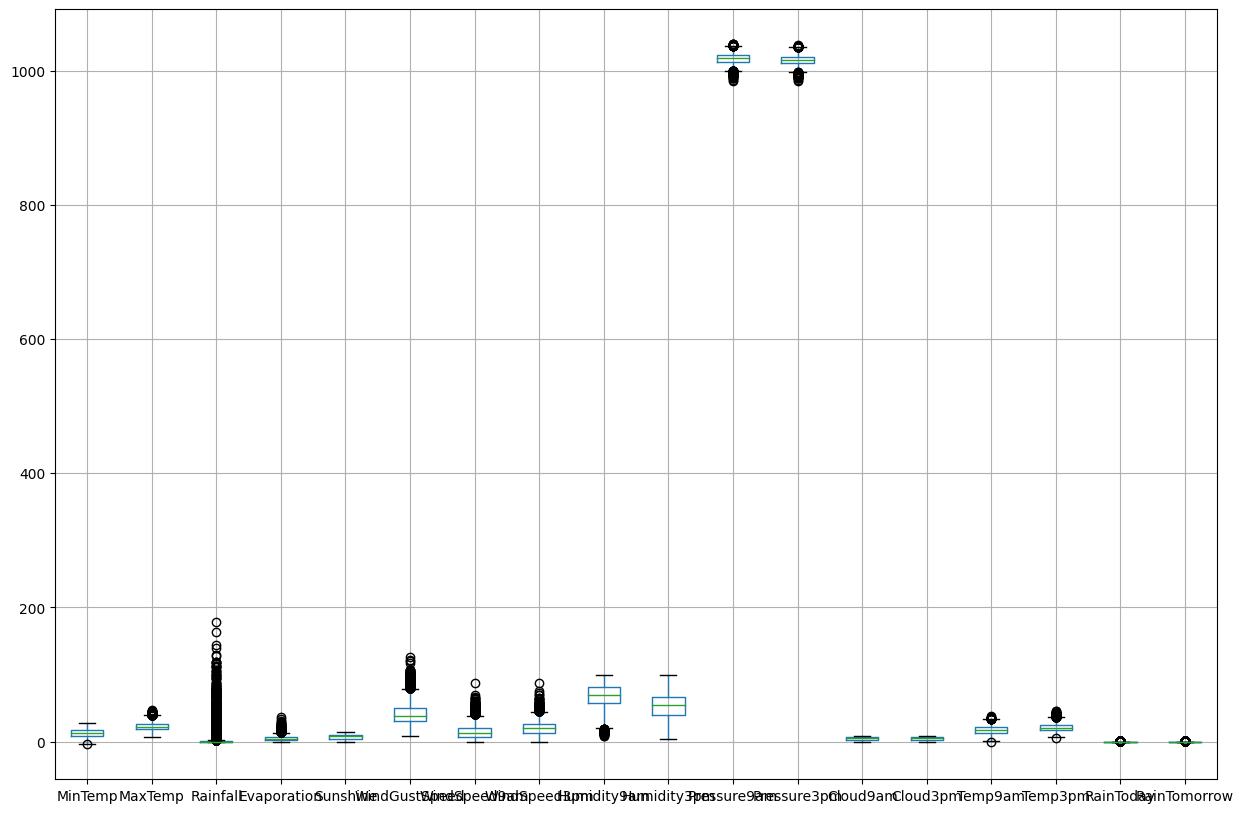

In [ ]:
df_train.boxplot(figsize=(15, 10))
plt.show()

### Para df_test

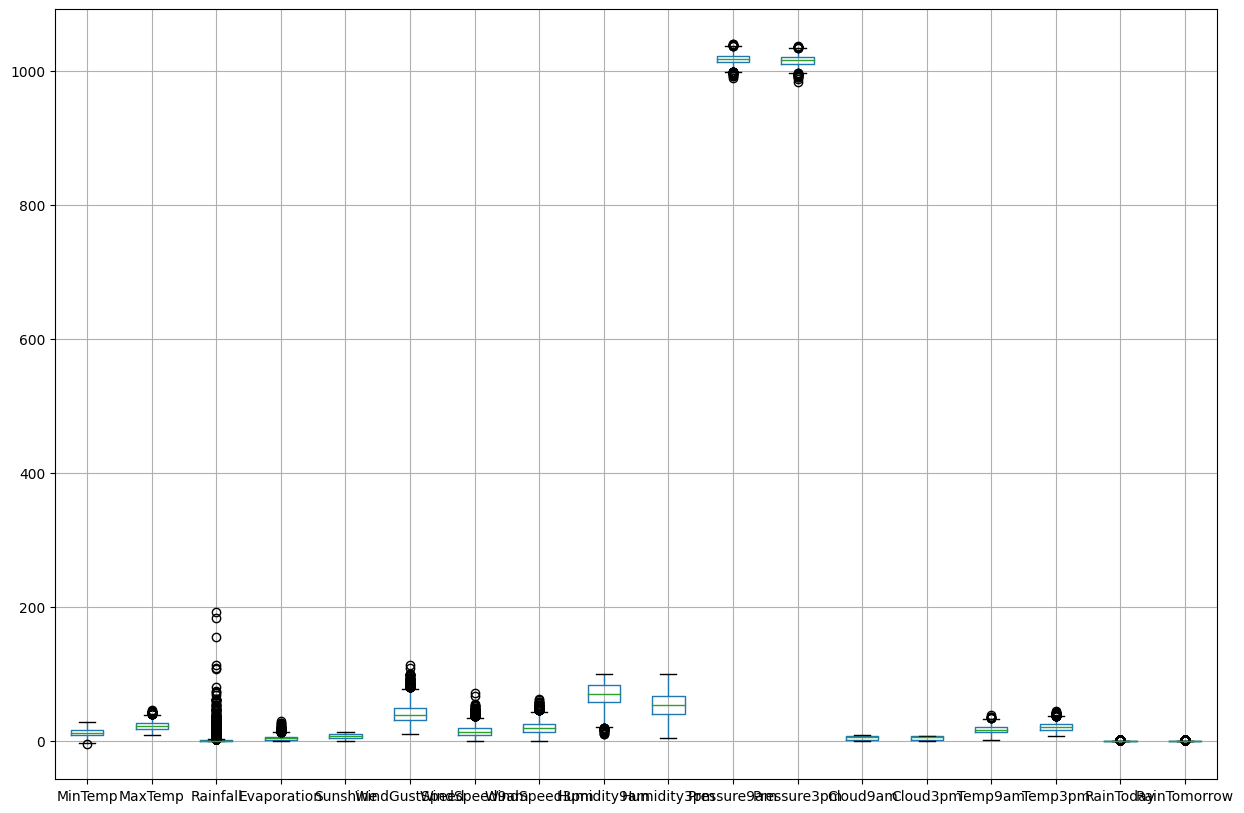

In [ ]:
df_test.boxplot(figsize=(15, 10))
plt.show()

## Escalado de datos

### Para df_train

### Para df_test